In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["visibility_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    227857.000000
mean       8247.670666
std        3106.366306
min          48.000000
25%        7998.000000
50%        9994.000000
75%        9994.000000
max        9994.000000
Name: visibility_o, dtype: float64

In [4]:
#resample visibility minor hour before
station=station_all[["visibility_o","temp_o"]].resample("H",label="right").min()


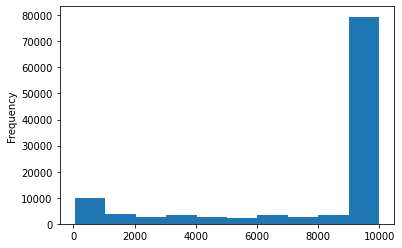

In [5]:
from locale import normalize
#station.value_counts()
station["visibility_o"].plot.hist();

In [6]:
#visibility to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels=['<= 1000 m', '> 1000 m']
station["vis_l"]=pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station=station.drop(columns=["temp_o"])
station.sample(20)

,visibility_o,vis_l
time,,
2016-06-15 04:00:00,7001.0,> 1000 m
2008-10-09 07:00:00,9656.0,> 1000 m
2010-06-08 03:00:00,4023.0,> 1000 m
2014-04-05 17:00:00,7001.0,> 1000 m
2009-07-14 09:00:00,9994.0,> 1000 m
2020-06-22 03:00:00,257.0,<= 1000 m
2009-09-28 06:00:00,9656.0,> 1000 m
2018-03-02 08:00:00,9994.0,> 1000 m
2017-12-09 01:00:00,257.0,<= 1000 m


**Forecast D1**

In [7]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")
ria_model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,187.022110,8.649026,15.076856,100682.117188,284.099640,0.950480,3850.537842,18.529049,365.889740,0.43,...,0.000000,-0.000117,0.0,1.001866,1.0000,1.001866,5441.062012,1395.217041,250.198868,277.625000
2008-01-02 01:00:00,223.194687,4.872746,8.553699,100766.039062,284.302551,0.952351,24042.478516,7.432752,365.840179,1.41,...,271.859985,-0.630313,1.0,1.003662,1.0000,1.003662,5421.849121,1390.475952,249.379623,276.878235
2008-01-02 02:00:00,213.398468,4.058958,7.745996,100725.421875,283.516113,0.931136,24043.144531,10.536634,361.979858,0.15,...,265.820007,-2.348477,0.0,0.003704,0.0000,0.003704,5403.857910,1385.831055,247.717194,276.178528
2008-01-02 03:00:00,193.151459,4.297006,8.272406,100640.812500,283.482239,0.911970,24036.058594,16.033491,323.539062,0.66,...,271.260010,-4.300562,1.0,0.000267,1.0000,1.000000,5392.368164,1382.380981,247.006317,275.906799
2008-01-02 04:00:00,185.437576,5.599997,9.705170,100599.703125,283.220490,0.917263,24037.439453,16.895048,324.586517,1.60,...,274.359985,-3.418750,1.0,0.003440,1.0000,1.000000,5385.979004,1380.468018,246.807068,276.245819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 19:00:00,157.686142,1.743530,4.707931,102008.992188,286.765930,0.922937,24102.066406,4.728705,312.395416,0.00,...,0.000000,-0.002773,0.0,0.500000,0.4000,0.500000,5657.847168,1509.066895,256.351013,281.325867
2020-11-12 20:00:00,132.306030,0.214833,3.802512,102066.460938,286.126678,0.942450,24164.826172,2.759448,370.614349,0.00,...,0.000000,0.000352,0.0,0.300000,0.5000,0.500000,5660.977051,1513.237671,256.373871,281.351135
2020-11-12 21:00:00,136.384262,1.121570,5.705152,102124.367188,286.267761,0.931932,24214.123047,3.625571,351.971375,0.00,...,0.000000,0.000469,0.0,0.300000,0.0625,0.300000,5664.547852,1517.838257,256.420868,280.955627


In [8]:
#label meteorological model prec points 0 to 9
ria_model4k["visibility0_l"]=pd.cut(ria_model4k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility1_l"]=pd.cut(ria_model4k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility2_l"]=pd.cut(ria_model4k["visibility2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility3_l"]=pd.cut(ria_model4k["visibility3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility4_l"]=pd.cut(ria_model4k["visibility4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility5_l"]=pd.cut(ria_model4k["visibility5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility6_l"]=pd.cut(ria_model4k["visibility6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [9]:
#concat station model
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["visibility_o"])
df_all4k[["vis_l","visibility0_l","visibility1_l"]].sample(20)

,vis_l,visibility0_l,visibility1_l
time,,,
2018-09-14 13:00:00,> 1000 m,> 1000 m,> 1000 m
2009-06-16 21:00:00,> 1000 m,> 1000 m,> 1000 m
2012-06-15 18:00:00,> 1000 m,> 1000 m,> 1000 m
2014-12-25 02:00:00,> 1000 m,> 1000 m,> 1000 m
2019-07-08 04:00:00,> 1000 m,> 1000 m,> 1000 m
2012-08-11 17:00:00,> 1000 m,> 1000 m,> 1000 m
2019-03-10 01:00:00,> 1000 m,<= 1000 m,<= 1000 m
2017-03-31 05:00:00,<= 1000 m,> 1000 m,<= 1000 m
2016-09-11 16:00:00,> 1000 m,> 1000 m,> 1000 m


In [10]:
print("station\n",df_all4k["vis_l"].value_counts())
print("point 0\n",df_all4k["visibility0_l"].value_counts())
print("point 1\n",df_all4k["visibility1_l"].value_counts())
print("point 2\n",df_all4k["visibility2_l"].value_counts())
print("point 3\n",df_all4k["visibility3_l"].value_counts())
print("point 4\n",df_all4k["visibility4_l"].value_counts())
print("point 5\n",df_all4k["visibility5_l"].value_counts())


station
 > 1000 m     102252
<= 1000 m      9481
Name: vis_l, dtype: int64
point 0
 > 1000 m     106570
<= 1000 m      5163
Name: visibility0_l, dtype: int64
point 1
 > 1000 m     106474
<= 1000 m      5259
Name: visibility1_l, dtype: int64
point 2
 > 1000 m     105456
<= 1000 m      6277
Name: visibility2_l, dtype: int64
point 3
 > 1000 m     107569
<= 1000 m      4164
Name: visibility3_l, dtype: int64
point 4
 > 1000 m     109249
<= 1000 m      2484
Name: visibility4_l, dtype: int64
point 5
 > 1000 m     108054
<= 1000 m      3679
Name: visibility5_l, dtype: int64


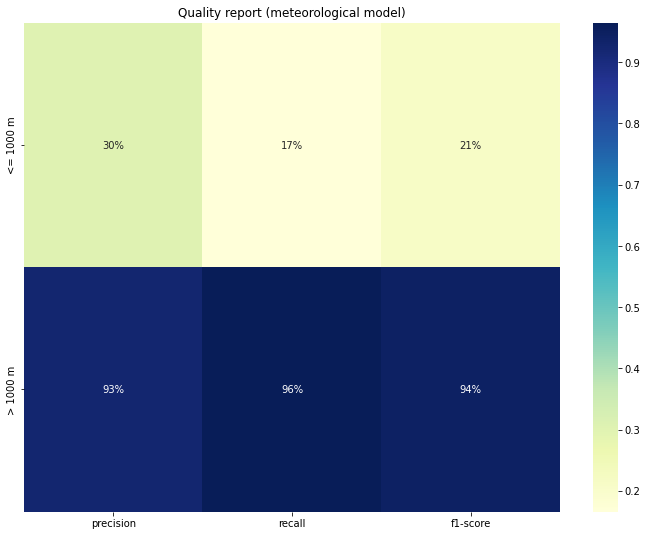

In [15]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.vis_l, df_all4k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


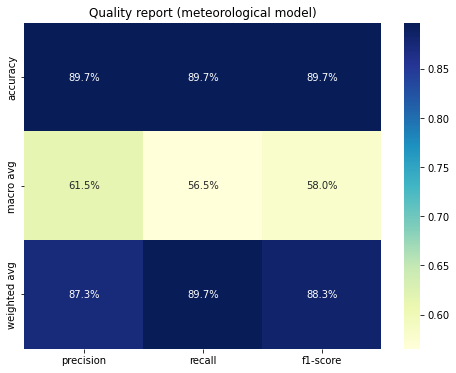

In [16]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

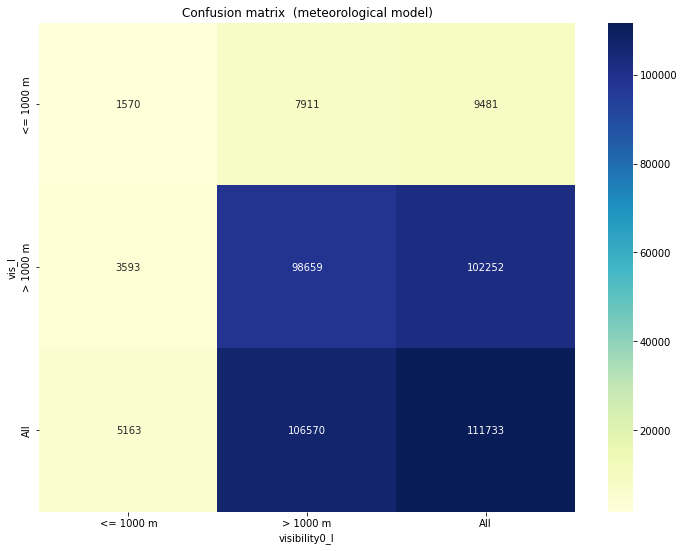

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix  (meteorological model)")
import seaborn as sns
global_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

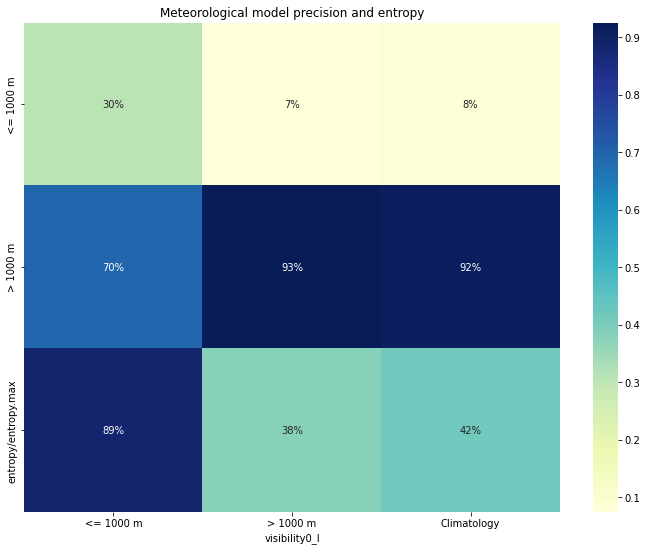

In [19]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Meteorological model precision and entropy")
column_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**machine learning d0 or d1**

In [20]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k.drop(columns=["visibility0_l","visibility1_l","visibility2_l",
                                    "visibility3_l","visibility4_l","visibility5_l",
                                    "visibility6_l"]),
             target = 'vis_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,vis_l
2,Target Type,Binary
3,Label Encoded,"<= 1000 m: 0, > 1000 m: 1"
4,Original Data,"(111733, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9234,0.8689,0.9941,0.9275,0.9596,0.2341,0.3104,34.110
et,Extra Trees Classifier,0.9233,0.8767,0.9943,0.9272,0.9596,0.2293,0.3074,11.578
lightgbm,Light Gradient Boosting Machine,0.9216,0.8743,0.9915,0.9278,0.9586,0.2346,0.2969,2.310
gbc,Gradient Boosting Classifier,0.9197,0.8582,0.9932,0.9247,0.9577,0.1825,0.2524,74.390
ridge,Ridge Classifier,0.9155,0.0000,1.0000,0.9155,0.9559,0.0000,0.0000,0.144
dummy,Dummy Classifier,0.9155,0.5000,1.0000,0.9155,0.9559,0.0000,0.0000,0.104
ada,Ada Boost Classifier,0.9157,0.8464,0.9924,0.9216,0.9557,0.1238,0.1818,14.510
lr,Logistic Regression,0.9152,0.8094,0.9971,0.9175,0.9556,0.0433,0.0978,12.834
knn,K Neighbors Classifier,0.9082,0.7178,0.9796,0.9246,0.9513,0.1614,0.1860,95.794
lda,Linear Discriminant Analysis,0.9033,0.8245,0.9645,0.9322,0.9481,0.2458,0.2539,0.570


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [21]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9211,0.8773,0.9914,0.9275,0.9584,0.2291,0.2910
1,0.9219,0.8747,0.9907,0.9287,0.9587,0.2479,0.3067
2,0.9206,0.8724,0.9896,0.9284,0.9580,0.2400,0.2941
3,0.9231,0.8782,0.9905,0.9301,0.9593,0.2699,0.3268
4,0.9221,0.8773,0.9911,0.9286,0.9588,0.2467,0.3071
Mean,0.9218,0.8760,0.9906,0.9287,0.9586,0.2467,0.3051
SD,0.0009,0.0021,0.0006,0.0009,0.0005,0.0134,0.0126


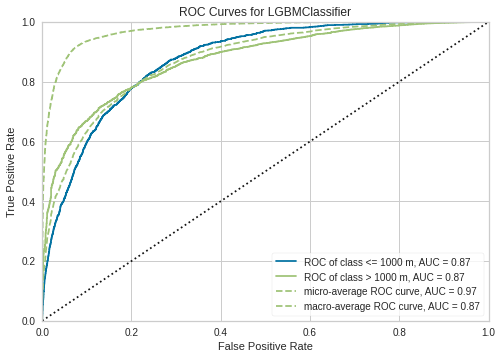

In [22]:
plot_model(model, plot = 'auc')

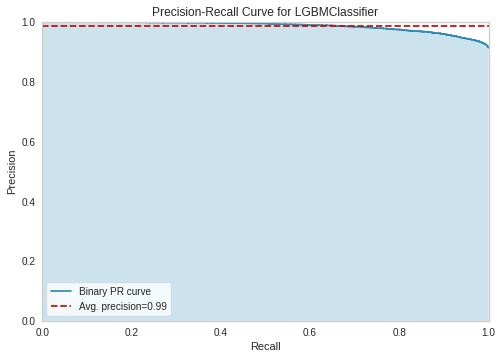

In [23]:
plot_model(model, plot = 'pr')

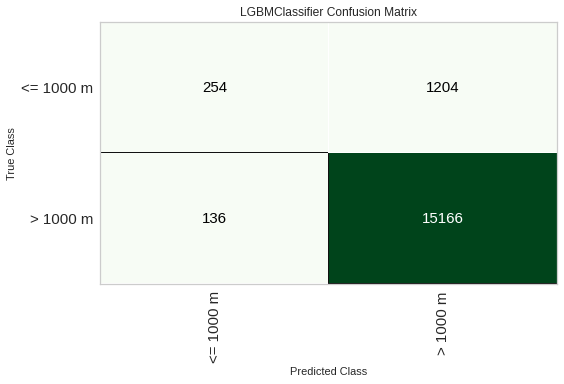

In [24]:
plot_model(model,'confusion_matrix')

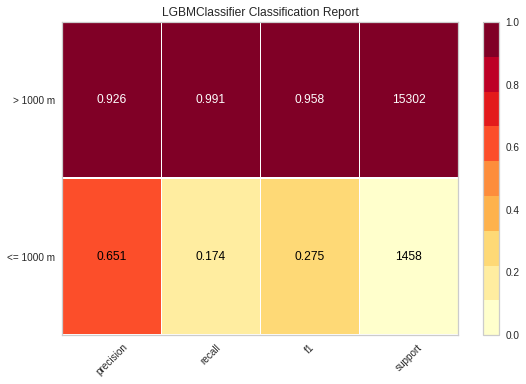

In [25]:
plot_model(model,'class_report')

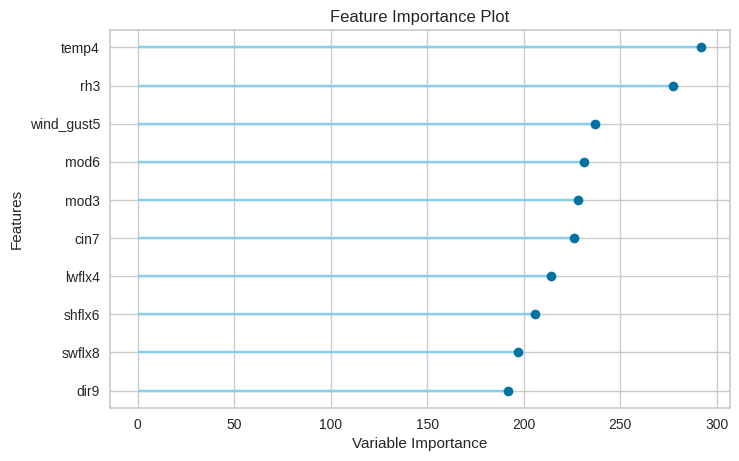

In [26]:
plot_model(model,"feature")

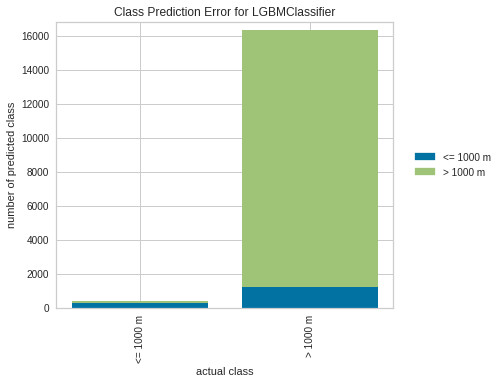

In [27]:
plot_model(model,"error")

**Export model**

In [28]:
x_var=get_config("X_train").columns
x_var

Index(['cfl5', 'cfl0', 'cfl3', 'visibility6', 'visibility3', 'visibility8',
       'cfl9', 'dir5', 'mod6', 'dir9', 'lwflx4', 'mod3', 'visibility1', 'dir8',
       'wind_gust5', 'temp4', 'swflx8', 'rh3', 'cfl1', 'visibility2', 'cfl6',
       'cfl8', 'cft9', 'visibility4', 'cfl4', 'cfl7', 'visibility0', 'lwflx9',
       'visibility9', 'lhflx8', 'dir4', 'shflx6', 'cfl2', 'cin7'],
      dtype='object')

In [29]:
#define x and y
Y=df_all4k.vis_l
X=df_all4k[x_var]

In [30]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


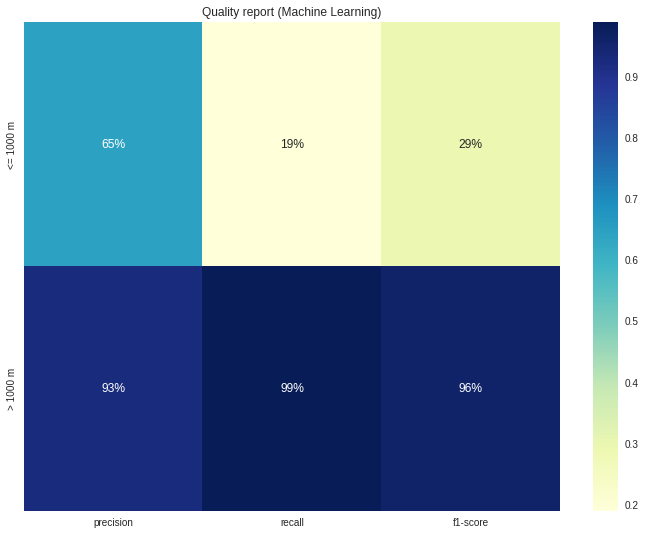

In [32]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


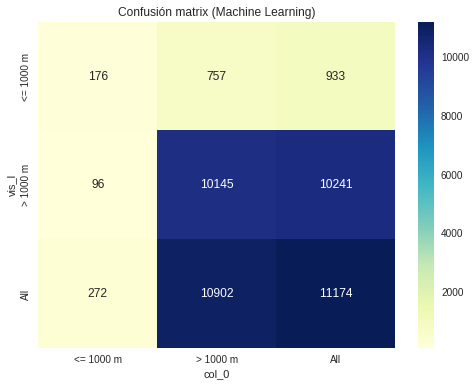

In [33]:
plt.figure(figsize=(8, 6))
plt.title("Confusión matrix (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

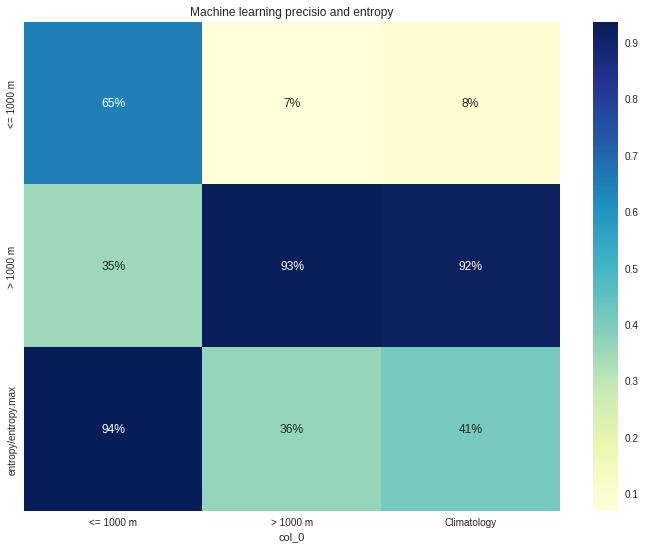

In [34]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Machine learning precisio and entropy")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [35]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("vis_LEVX_d1.al", 'wb'))